In [ ]:
!pip show geopandas

In [ ]:
import os, geopandas as gpd
countries= gpd.read_file('https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Countries.shp')


In [ ]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
countries.shape

(252, 2)

In [ ]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
countries.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

In [ ]:
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [ ]:
countries[countries.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [COUNTRY, geometry]
Index: []

In [ ]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

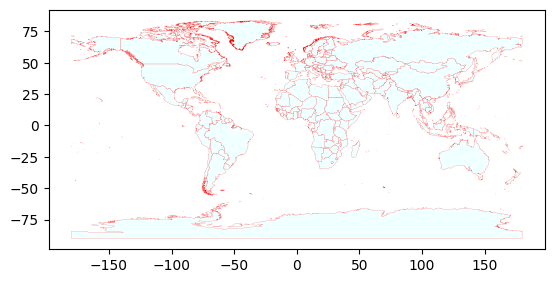

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [ ]:
rivers=gpd.read_file("https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Hydrography.shp")
cities=gpd.read_file("https://github.com/davasquezm/introgeodf/raw/refs/heads/main/maps/World_Cities.shp")

In [ ]:
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

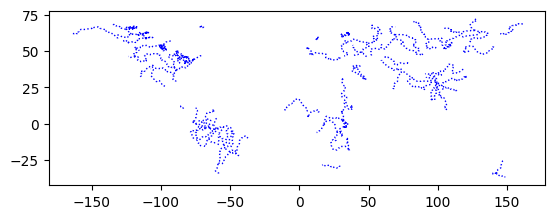

In [ ]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

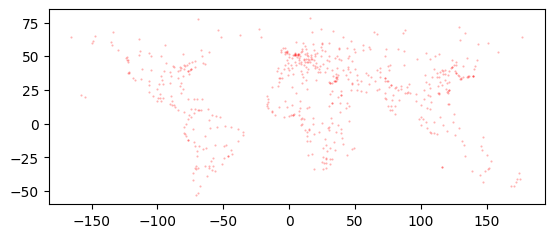

In [ ]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

<Axes: >

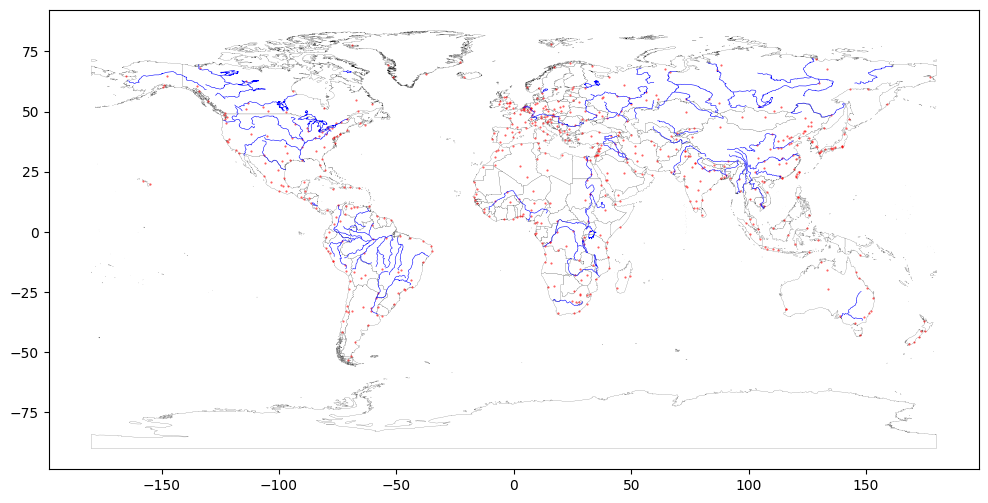

In [ ]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [ ]:
import os
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

In [ ]:
countries

COUNTRY                                           geometry
0      Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1      Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2              Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3                  Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4               Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...
..                     ...                                                ...
247            South Sudan  POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...
248              Indonesia  MULTIPOLYGON (((123.21846 -10.80917, 123.19832...
249             East Timor  MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -...
250  Curacao (Netherlands)  POLYGON ((-68.96556 12.19889, -68.91196 12.181...
251  Bonaire (Netherlands)  POLYGON ((-68.19736 12.22264, -68.19292 12.207...

[252 rows x 2 columns]

In [ ]:
India=countries[countries.COUNTRY=='India']

In [ ]:
India.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
  India.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
India.crs.is_projected

False

In [ ]:
India.centroid

<ipython-input-65-abb7a827f9dc>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  India.centroid


104    POINT (79.61623 22.8836)
dtype: geometry

In [ ]:
India.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
India.to_crs(4326).centroid

<ipython-input-67-21467515e2ad>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  India.to_crs(4326).centroid


104    POINT (79.61623 22.8836)
dtype: geometry

<ipython-input-68-e22db78708ee>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  India.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

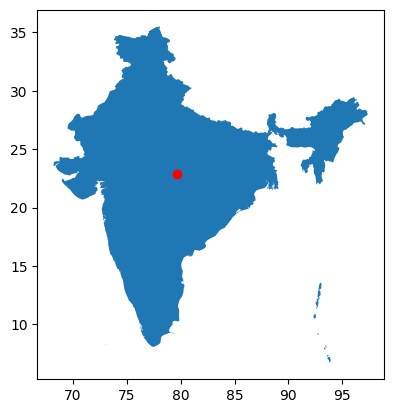

In [ ]:
# replotting:

base4326=India.to_crs(4326).plot()
India.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [ ]:
cities_India_4326=cities[cities.COUNTRY=='India'].to_crs(4326)

In [ ]:
riversIndia_clipped=gpd.clip(rivers,India)

In [ ]:
India_4326=India.to_crs(4326)

rivers_India_4326=riversIndia_clipped.to_crs(India_4326.crs)

In [ ]:
## saving


import os

India_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_India_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_India_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='rivers', driver="GPKG")
#India_4326.centroid.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='centroid', driver="GPKG")

**EJERCICIO 1**


In [ ]:
import pandas as pd
import os
infoairports=pd.read_csv(os.path.join("data", "br-airports.csv"))
# some rows
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:]


id        ident                 type  \
0     #meta +id  #meta +code  #loc +airport +type   
1          5910         SBGR        large_airport   
2          5906         SBGL        large_airport   
3          5974         SBSP       medium_airport   
6668     309669         SSVR               closed   
6669     505308      BR-1760             heliport   
6670     341727      BR-1429             heliport   
6671     343017      BR-1493             heliport   

                                                   name latitude_deg  \
0                                   #loc +airport +name    #geo +lat   
1     Guarulhos - Governador André Franco Montoro In...   -23.431944   
2          Rio Galeão – Tom Jobim International Airport   -22.809999   
3                                     Congonhas Airport   -23.627657   
6668                              Volta Redonda Airport     -22.4978   
6669                       Unimed Volta Redonda Helipad   -22.533988   
6670                              Santa Helena Heliport    -23.59851   
6671              Bandeiras Centro Empresarial Heliport   -23.536615   

     longitude_deg         elevation_ft                 continent  \
0        #geo +lon  #geo +elevation +ft  #region +continent +code   
1       -46.467778                 2461                        SA   
2       -43.250557                   28                        SA   
3       -46.654601                 2631                        SA   
6668       -44.085                 1245                        SA   
6669    -44.076918                 1385                        SA   
6670    -47.441196                 2254                        SA   
6671    -47.449475                 1827                        SA   

        country_name           iso_country  ...              municipality  \
0     #country +name  #country +code +iso2  ...  #loc +municipality +name   
1             Brazil                    BR  ...                 São Paulo   
2             Brazil                    BR  ...            Rio De Janeiro   
3             Brazil                    BR  ...                 São Paulo   
6668          Brazil                    BR  ...             Volta Redonda   
6669          Brazil                    BR  ...             Volta Redonda   
6670          Brazil                    BR  ...                Votorantim   
6671          Brazil                    BR  ...                Votorantim   

       scheduled_service                  gps_code                  iata_code  \
0     #status +scheduled  #loc +airport +code +gps  #loc +airport +code +iata   
1                      1                      SBGR                        GRU   
2                      1                      SBGL                        GIG   
3                      1                      SBSP                        CGH   
6668                   0                       NaN                        NaN   
6669                   0                      SSKV                        NaN   
6670                   0                      SWHE                        NaN   
6671                   0                      SWST                        NaN   

                      local_code  \
0     #loc +airport +code +local   
1                         SP0002   
2                         RJ0001   
3                         SP0001   
6668                         NaN   
6669                      RJ0147   
6670                      SP0807   
6671                      SP1306   

                                              home_link  \
0                                   #meta +url +airport   
1                    http://www.aeroportoguarulhos.net/   
2                                                   NaN   
3     http://www.infraero.gov.br/usa/aero_prev_home....   
6668                                                NaN   
6669                                                NaN   
6670                                                NaN   
6671                                       

In [ ]:
# keep columns needed
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [ ]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6672 non-null   object
 1   type           6672 non-null   object
 2   latitude_deg   6672 non-null   object
 3   longitude_deg  6672 non-null   object
 4   elevation_ft   6501 non-null   object
 5   region_name    6672 non-null   object
 6   municipality   6648 non-null   object
dtypes: object(7)
memory usage: 365.0+ KB


In [ ]:
numericCols=['latitude_deg', 'longitude_deg', 'elevation_ft']
for col in numericCols:
  infoairports[col]=pd.to_numeric(infoairports[col], errors= 'coerce')

infoairports[numericCols]=infoairports[numericCols].apply(pd.to_numeric)

In [ ]:
#now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6672 non-null   object 
 1   type           6672 non-null   object 
 2   latitude_deg   6671 non-null   float64
 3   longitude_deg  6671 non-null   float64
 4   elevation_ft   6500 non-null   float64
 5   region_name    6672 non-null   object 
 6   municipality   6648 non-null   object 
dtypes: float64(3), object(4)
memory usage: 365.0+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

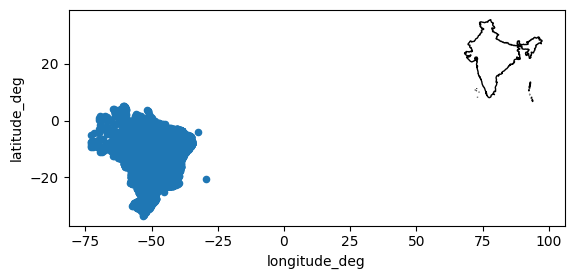

In [ ]:
# let's plot

base = India_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

<Axes: >

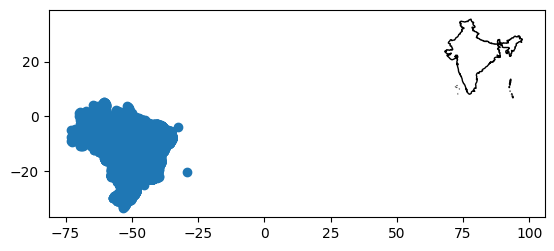

In [ ]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=India.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = India_4326.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [ ]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

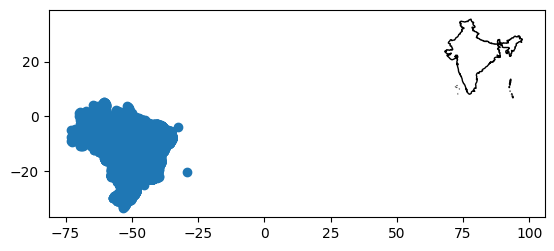

In [ ]:
airports_4326=airports.to_crs(4326)

## then

base = India_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [ ]:
airports_4326['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport          4587
heliport               1699
closed                  251
medium_airport          124
large_airport             8
seaplane_base             2
#loc +airport +type       1
Name: count, dtype: int64

In [ ]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_4326.to_file(os.path.join("maps","IndiaMaps_4326.gpkg"), layer='airports', driver="GPKG")

**EJERCICIO 2**

In [ ]:
India_4326

COUNTRY                                           geometry
104   India  MULTIPOLYGON (((92.2686 23.71944, 92.20305 23....

In [ ]:
India_4326.boundary

104    MULTILINESTRING ((92.2686 23.71944, 92.20305 2...
dtype: geometry

<Axes: >

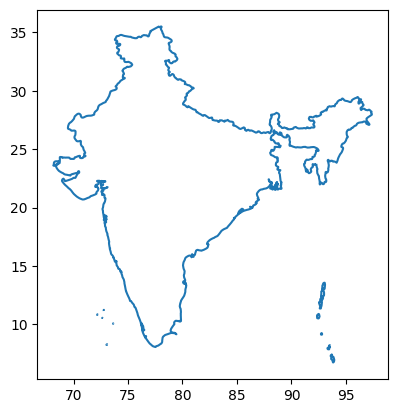

In [ ]:
India_4326.boundary.plot()

In [ ]:
type(India_4326.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
India_4326.boundary.to_frame()

0
104  MULTILINESTRING ((92.2686 23.71944, 92.20305 2...

In [ ]:
India_4326.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 104 to 104
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [ ]:
# conversion
India_border=India_4326.boundary.to_frame()

# new column (optional)
India_border['name']='India'

# renaming the geometry column
India_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
India_border = India_border.set_geometry("geometry")

# verifying:
India_border.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
India_border

geometry   name
104  MULTILINESTRING ((92.2686 23.71944, 92.20305 2...  India

**EJERCICIO 3**

Let's read the maps on states(adm1) and municipalities (adm2):

In [ ]:
India_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
India_municipalities=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

They are maps, for sure:

In [ ]:
type(India_states), type(India_municipalities)

In [ ]:
India_states.geometry.head()

In [ ]:
India_municipalities.geometry.head()

But, notice this:

In [ ]:
India_states.crs, India_municipalities.crs

They do not have crs information, however they can be plotted:

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

India_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
India_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

Since we are using the crs 5641 for Brazil, the initial strategy could be to set the CRS with the right projection :

In [ ]:
## uncomment this to see the error message
# India_states.to_crs(5641)

Python says "Please set a crs on the object first". This would mean to know the actual projection, of the geometry:

From the plots above and the rows seen, we conclude the maps are unprojected; then:

In [ ]:
# set as unprojected
India_states.crs = "EPSG:4326"
India_municipalities.crs = "EPSG:4326"

Now, we can reproject:

In [ ]:
India_states=India_states.to_crs(5641)
India_municipalities=India_municipalities.to_crs(5641)

**EJERCICIO 4**

**Geo Merging**

The countries map has no interesting information beyond the geometry.

In [ ]:
countries.head()

Let add some information to each country:

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

We want to add the fragilityCia data into the map. That is the merging process. For that, we need a common column. The Country column is the option.

In [ ]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

Check here:

In [ ]:
onlyFragilCia

In [ ]:
# and here
onlyMap

Fuzzy merging

Let's find similar names:

In [ ]:
# !pip install thefuzz

In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# keeping high scores

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

Preparing a dict of changes:

In [ ]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

Making changes and updating:

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# some manual

countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

In [ ]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

In [ ]:
# changing
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# new update
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

We can not improve the situation.

Now, when you merge a GDF with a DF, the GDF has to be on the left:

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

**Choropleths**

Transformation of data values
Re Scaling

Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
# !pip install -U scikit-learn

*   StandardScaler:




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

*   MinMaxScaler:



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

*   RobustScaler:



In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

*   QuantileTransformer:



In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

Discretizing

I will keep the data_Qt data frame. Now, I want cut the data. Please install numba before runing the next code; also make sure you have pysal, mapclassify and numpy installed:

In [ ]:
! pip show numba mapclassify numpy

In [ ]:
# !pip install mapclassify

Let me discretize fragility_Qt:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification? Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the adcms:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

We are ready for a choropleth:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")